# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [0]:
from google.colab import files

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.datasets import mnist

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
from keras.callbacks import LearningRateScheduler

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


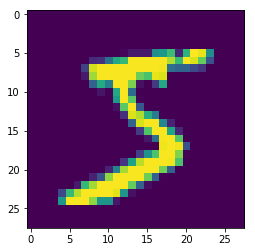

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Architecting a deep learning model for MNIST dataset

# CODE 1:  
Choosing an initial architecture for the model  

> 28x28x1  | 3x3x1x8  
26x26x8  | 3x3x8x16  
24x24x16 | 3x3x16x24  
>
> 22x22x24 | MaxPooling  
11x11x24 | 1x1x24x8  
>
> 11x11x8  | 3x3x8x16  
9x9x16   | 3x3x16x32  
7x7x32   | 1x1x32x10  
7x7x10   | 7x7x10



In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 11, 11, 8)         200       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 7, 7, 24)          3480      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

- Defining the ModelCheckpoint callback to save the best model based on monitored value

In [0]:
checkpoint = ModelCheckpoint('model_assignment_4.h5', save_best_only=True,monitor='val_acc')

- Training the model for 10 epochs with batch size 32

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.2004 - acc: 0.9383 - val_loss: 0.0684 - val_acc: 0.9772
Epoch 2/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0652 - acc: 0.9802 - val_loss: 0.0665 - val_acc: 0.9793
Epoch 3/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0498 - acc: 0.9847 - val_loss: 0.0478 - val_acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0386 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0309 - val_acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.0355 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.

### Observation: 
We have reached a validation accuracy of **99.11% in the 7th epoch**. There is an observable gap between the training and validation accuracy in the 8th and 9th epoch.  

The absolute difference is  
0.0006  - 7th epoch  
0.0016  - 8th epoch  
0.0046  - 9th epoch

### Inference: 
The model is overfitting after 7th epoch 

### EXPERIMENT: 
**Reduce the number of kernels** to prevent overfitting

### Expectation: 
Increase in validation accuracy

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

W0821 00:57:39.556133 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0821 00:57:39.598793 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 00:57:39.606263 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpoint = ModelCheckpoint('model_assignment_4c.h5', save_best_only=True,monitor='val_acc')

W0821 00:58:55.342418 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 00:58:55.366977 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        170       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          2320      
__________

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0821 00:59:06.228381 140154775730048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 00:59:06.313453 140154775730048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1955 - acc: 0.9405 - val_loss: 0.0752 - val_acc: 0.9752
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0667 - acc: 0.9801 - val_loss: 0.0530 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0417 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0436 - val_acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0360 - acc: 0.9883 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0459 - val_acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.

### Observation:
**Validation accuracy did not improve** after reducing number of kernels. Highest validation accuracy in the above training was 98.99%

### Inference:
We need to try a different approach to reduce overfitting. Reducing the number of kernels has not worked. 


### EXPERIMENT:
Reverting to previously chosen kernels and adding **batch normalization** after each Convolution2D layer to reduce overfitting  
(Batch Normalization reduces internal covariate shift which in turn reduces overfitting)

### Expectation:
Validation accuracy should increase

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpoint = ModelCheckpoint('model_assignment_4g.h5', save_best_only=True,monitor='val_acc')

W0821 09:48:21.981429 140427764012928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0821 09:48:22.033600 140427764012928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:48:22.045079 140427764012928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 09:48:22.097823 140427764012928 deprecation_wrapper.py:119] From /usr/local/lib/pyt

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 24)        0         
__________

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0821 09:48:33.574261 140427764012928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.1367 - acc: 0.9575 - val_loss: 0.0598 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0384 - acc: 0.9877 - val_loss: 0.0319 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0272 - val_acc: 0.9906
Epoch 5/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0273 - acc: 0.9910 - val_loss: 0.0297 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.0218 - acc: 0.9927 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0201 - acc: 0.9935 - val_loss: 0.

### Observation:
1) Validation accuracy improved to **99.17% in the 6th epoch**. **(IMPROVEMENT 1)**

2) The absolute difference between the training and validation accuracy is  
0.0010  - 6th epoch  
0.0035  - 7th epoch  
0.0034  - 8th epoch  
0.0044  - 9th epoch  
0.0046  - 10th epoch  

3) There is an increase decrease fluctuation in the validation accuracy and vice versa is the validation loss after 6th epoch

### Inference:
1) Batch Normalization has improved the model accuracy

2) Model is overfitting after 6th epoch. 

3) The model is slightly diverging instead of converging (after 6th epoch). This could be due to learning rate being high


# CODE 2:
CODE 2 = CODE 1 + Batch Normalization + Reducing Learning rate

### EXPERIMENT:
Use a learning rate scheduler to gradually **decrease the learning rate** for each epoch

### Expectation:
Validation accuracy should increase and the divergent behavior should reduce


In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
from keras.optimizers import Adam

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])
checkpoint = ModelCheckpoint(root_path+'model_assignment_4e.h5', save_best_only=True,monitor='val_acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 24)        0         
__________

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 39s 648us/step - loss: 0.1046 - acc: 0.9671 - val_loss: 0.0590 - val_acc: 0.9817
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 37s 619us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0403 - val_acc: 0.9865
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 37s 618us/step - loss: 0.0330 - acc: 0.9894 - val_loss: 0.0450 - val_acc: 0.9858
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 37s 618us/step - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0351 - val_acc: 0.9884
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

### Observation:
Model accuracy has increased to **99.26% (10th epoch)** after using a learning rate scheduler to decrease the learning rate. **(IMPROVEMENT 2)**

### Inference:
Since the highest validation accuracy was observed at the last epoch, we may see it increase further with increase in number of epochs (as learning rate is reduced with each epoch)

# CODE 3: 
CODE 3 = CODE 2 + Increase number of epochs to 15

### EXPERIMENT:
Increase **number of epochs to 15**

### Expectation:
Validation accuracy should increase 

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])
checkpoint = ModelCheckpoint(root_path+'model_assignment_4e.h5', save_best_only=True,monitor='val_acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-package

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_24 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 24)        0         
__________

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 41s 686us/step - loss: 0.1144 - acc: 0.9639 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 38s 630us/step - loss: 0.0451 - acc: 0.9857 - val_loss: 0.0347 - val_acc: 0.9889
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 38s 631us/step - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 38s 631us/step - loss: 0.0262 - acc: 0.9912 - val_loss: 0.0313 - val_acc: 0.9902
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

### Observation:
1) Model accuracy has increased to **99.35% (15th epoch)** after increasing number of epochs to 15. **(IMPROVEMENT 3)**

2) Considerable difference between training and validation accuracy still exists

### Inference:
Model is still overfitting

# CODE 4: 
CODE 4 = CODE 3 + DropOut

### EXPERIMENT:
Adding a **DropOut** of 0.05 after each layer

### Expectation:
Validation accuracy should increase and overfitting should reduce

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

from keras.layers import Activation
from keras.optimizers import Adam
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])
checkpoint = ModelCheckpoint(root_path+'model_assignment_4h.h5', save_best_only=True,monitor='val_acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Upd

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 24)        3480      
__________

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 47s 791us/step - loss: 0.1270 - acc: 0.9597 - val_loss: 0.0457 - val_acc: 0.9840
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 43s 725us/step - loss: 0.0537 - acc: 0.9833 - val_loss: 0.0421 - val_acc: 0.9852
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 44s 732us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0295 - val_acc: 0.9904
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 44s 736us/step - loss: 0.0320 - acc: 0.9894 - val_loss: 0.0313 - val_acc: 0.9898
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

### Observation:
1) Model accuracy has increased to **99.48% (13th epoch)** after adding DropOut **(IMPROVEMENT 4)**

2) Difference between training and validation accuracy is not as much as before

### Inference:
Overfitting has reduced


### Model accuracy of 99.48% achieved (using 15,160 params; within 15 epochs)

### Can we reach validation accuracy >=99.4% with <15k params

Params of model above is slightly more than 15k. Let's see if we can bring it below 15k and still achieve validation accuracy of >=99.4%

To reduce model params, we are  
1)  Removing bias  
2) Reducing number of kernels slightly (from 16 to 14 in 2nd and 5th Conv2D layer)

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

from keras.layers import Activation
from keras.optimizers import Adam
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(14, 3, 3, activation='relu', bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(24, 3, 3, activation='relu', bias=False)) # 22
model.add(BatchNormalization())

model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu', bias=False)) # 11
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(14, 3, 3, activation='relu', bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(24, 3, 3, activation='relu', bias=False)) # 7
model.add(BatchNormalization())

model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, activation='relu', bias=False)) #7
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(10, 7, bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])
checkpoint = ModelCheckpoint(root_path+'model_assignment_4i.h5', save_best_only=True,monitor='val_acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", use_bias=False)`
/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 14)        1008      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 24)        3024      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 7, use_bias=False)`


In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 43s 718us/step - loss: 0.1268 - acc: 0.9609 - val_loss: 0.0609 - val_acc: 0.9817
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 41s 681us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0327 - val_acc: 0.9899
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 40s 675us/step - loss: 0.0430 - acc: 0.9867 - val_loss: 0.0318 - val_acc: 0.9891
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 40s 673us/step - loss: 0.0342 - acc: 0.9889 - val_loss: 0.0264 - val_acc: 0.9924
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

### Model accuracy of 99.4% achieved (15th epoch; using 13,876 params)